In [14]:
import os
import sys
import csv
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..',))
sys.path.append(repo_root)

from src import *

In [4]:
process_directory(os.getcwd(), 'ex03.1')
process_directory(os.getcwd(), 'ex03.2')
process_directory(os.getcwd(), 'ex03.3')
process_directory(os.getcwd(), 'ex03.4')

In [29]:


def group_results_df(averages_df, compared_col, title, metric_type='mean', value_tested='M'):
    results = []

    for _, group in averages_df.groupby([value_tested]):
        base_values = group.iloc[0, :]

        if metric_type == 'mean':
            values = calculate_column_means_against_base(group, compared_col)
        elif metric_type == 'proportion':
            if title == 'RMS':
                values = calculate_percentages_against_base(group, compared_col, flipped=True)
            else:
                values = calculate_percentages_against_base(group, compared_col)

        values[value_tested] = base_values[value_tested]  
        results.append(values)

    result_df = pd.DataFrame(results)
  
    return result_df
 


def plot_results(ax, df, metric_type, title, value_tested):
    values = df[value_tested]

    for column in df.columns:
        if column != value_tested:
            ax.plot(values, df[column], label=column, marker='o' if metric_type == 'proportion' else 's')

    ax.set_xlabel(value_tested)
    ax.set_ylabel('Proportion' if metric_type == 'proportion' else 'Mean')
    ax.set_title(title)
    ax.legend()


def visualize_results(base_path, compared_col, metric_type='mean', value_tested='ratio'):
    # Read the summary CSV files
    log_likelihood_df = pd.read_csv(os.path.join(base_path, 'log_likelihood_summary.csv'))
    leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path, 'leadership_log_likelihood_summary.csv'))
    rms_df = pd.read_csv(os.path.join(base_path, 'rms_summary.csv'))
    rho_df = pd.read_csv(os.path.join(base_path, 'rho_summary.csv'))
    tau_df = pd.read_csv(os.path.join(base_path, 'tau_summary.csv'))

    # List of dataframes and their titles
    dataframes = [
        (log_likelihood_df, 'Log Likelihood'),
        (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
        (rms_df, 'RMS'),
        (rho_df, 'Rho'),
        (tau_df, 'Tau')
    ]

    fig, axes = plt.subplots(1, 5, figsize=(50, 12), sharey=True)
    axes = axes.flatten()

    for i, (df, title) in enumerate(dataframes):
        grouped_df = group_results_df(df, compared_col, title, metric_type, value_tested)
        plot_results(axes[i], grouped_df, metric_type, title, value_tested)

    plt.tight_layout()
    plt.show()


# M

### Higher Order

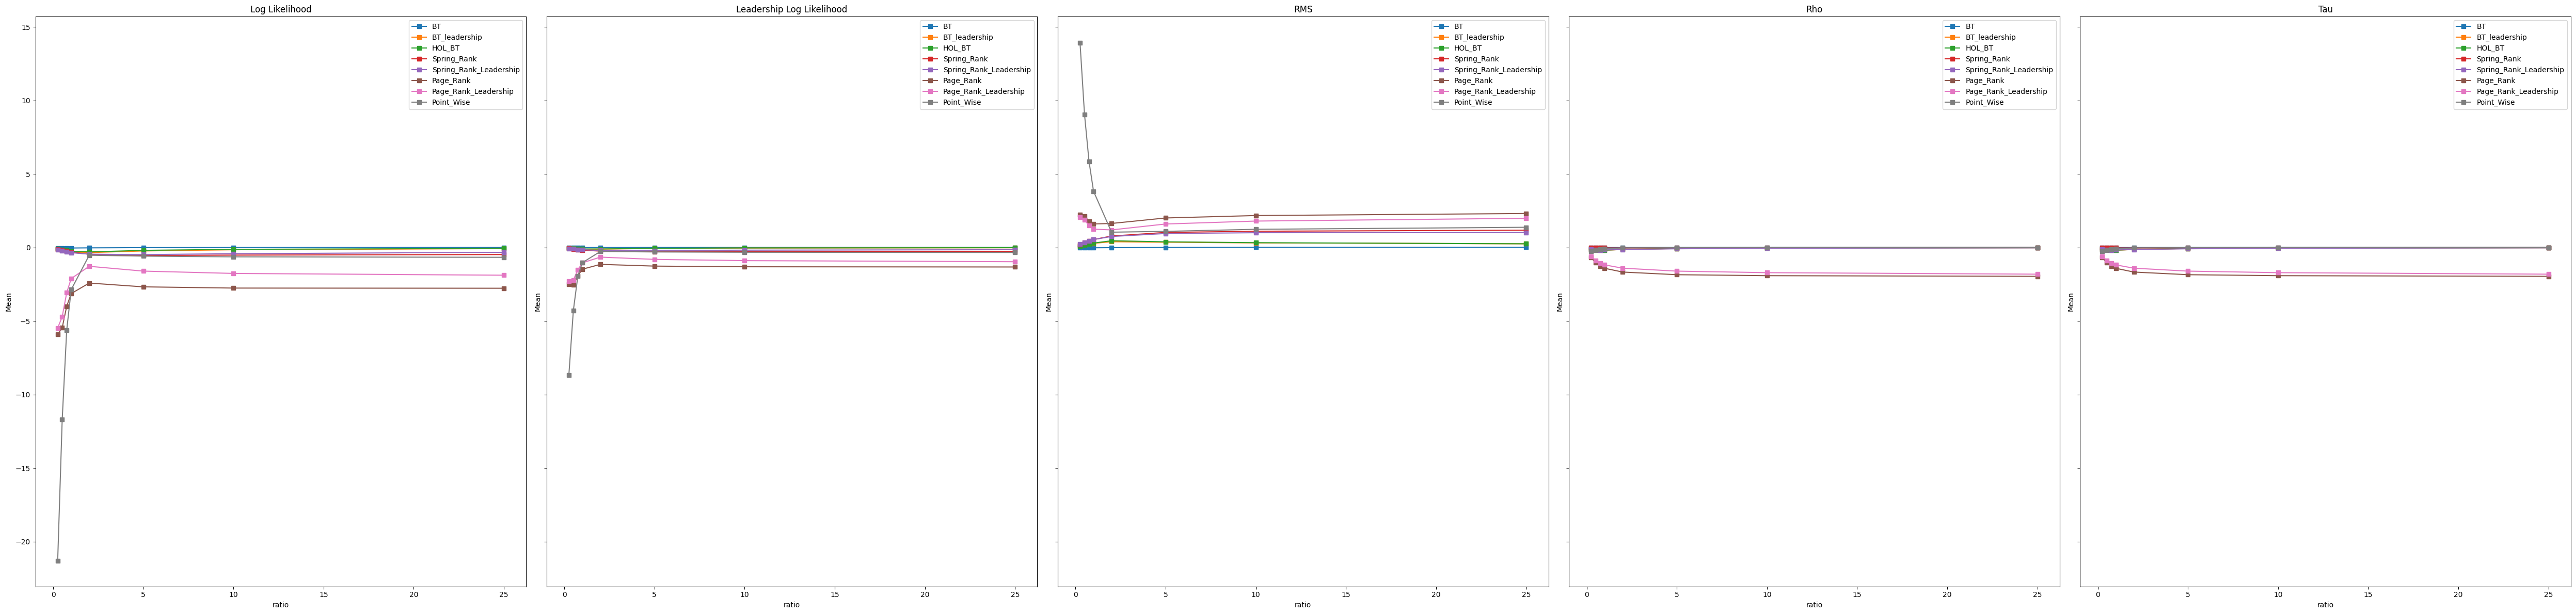

In [30]:
path = os.path.join(os.getcwd(), 'results', 'ex03.1')
visualize_results(path, compared_col='HO_BT', metric_type='mean')


### Higher Order Leadership

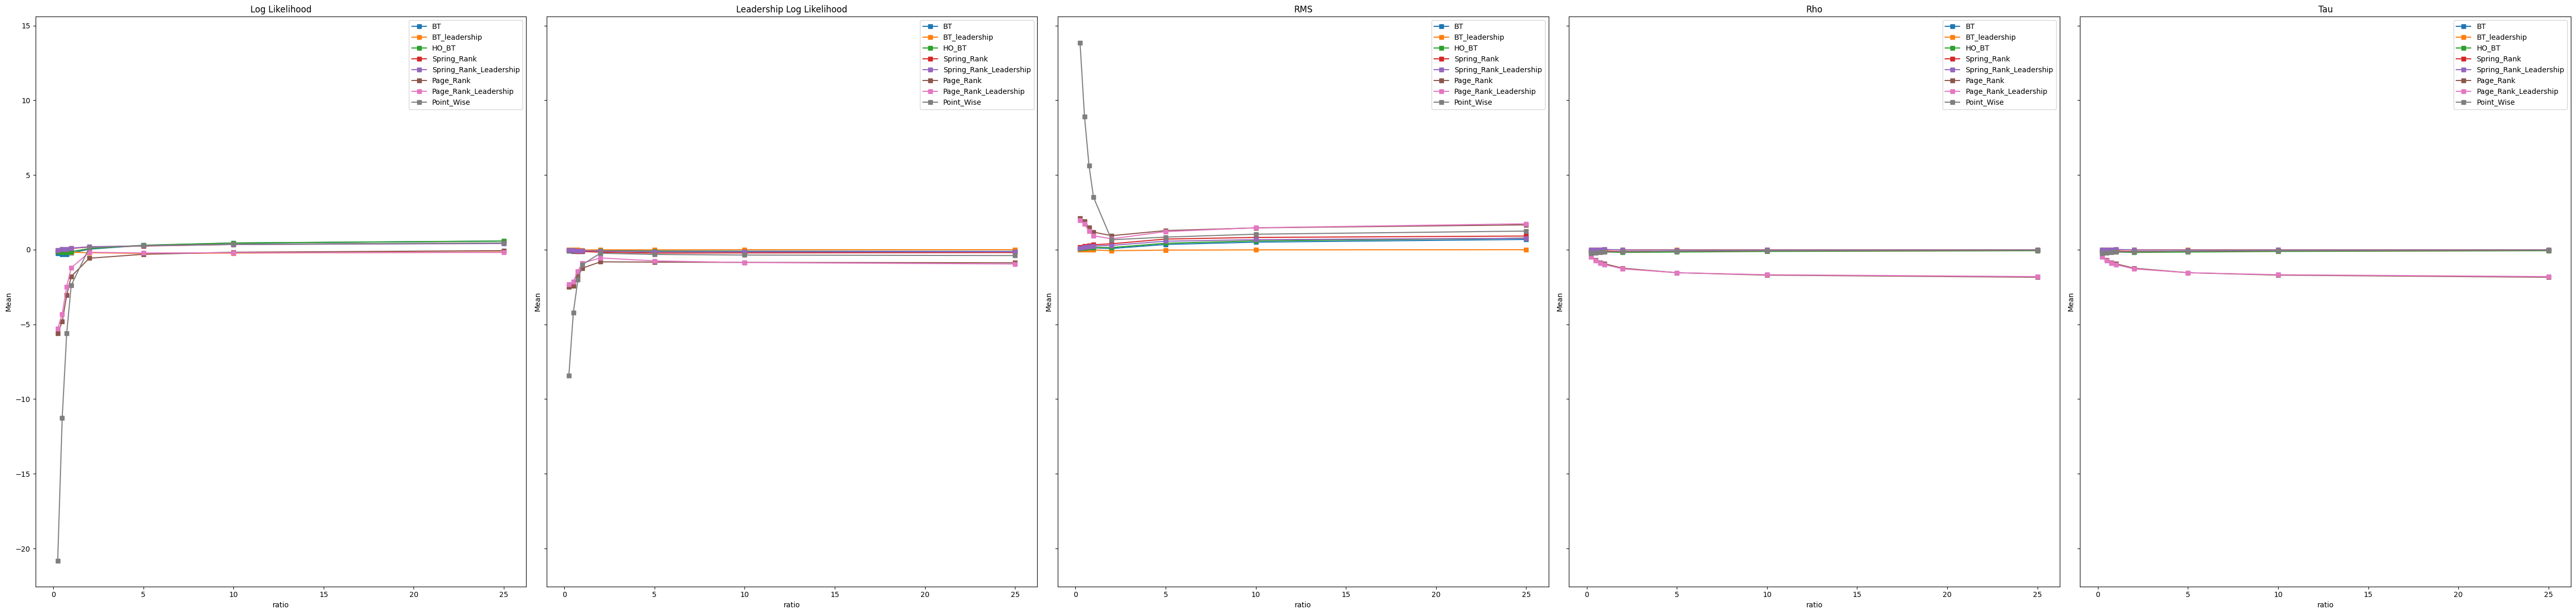

In [32]:
path = os.path.join(os.getcwd(), 'results', 'ex03.2')
visualize_results(path, compared_col='HOL_BT', metric_type='mean')

# K

### Higher Order

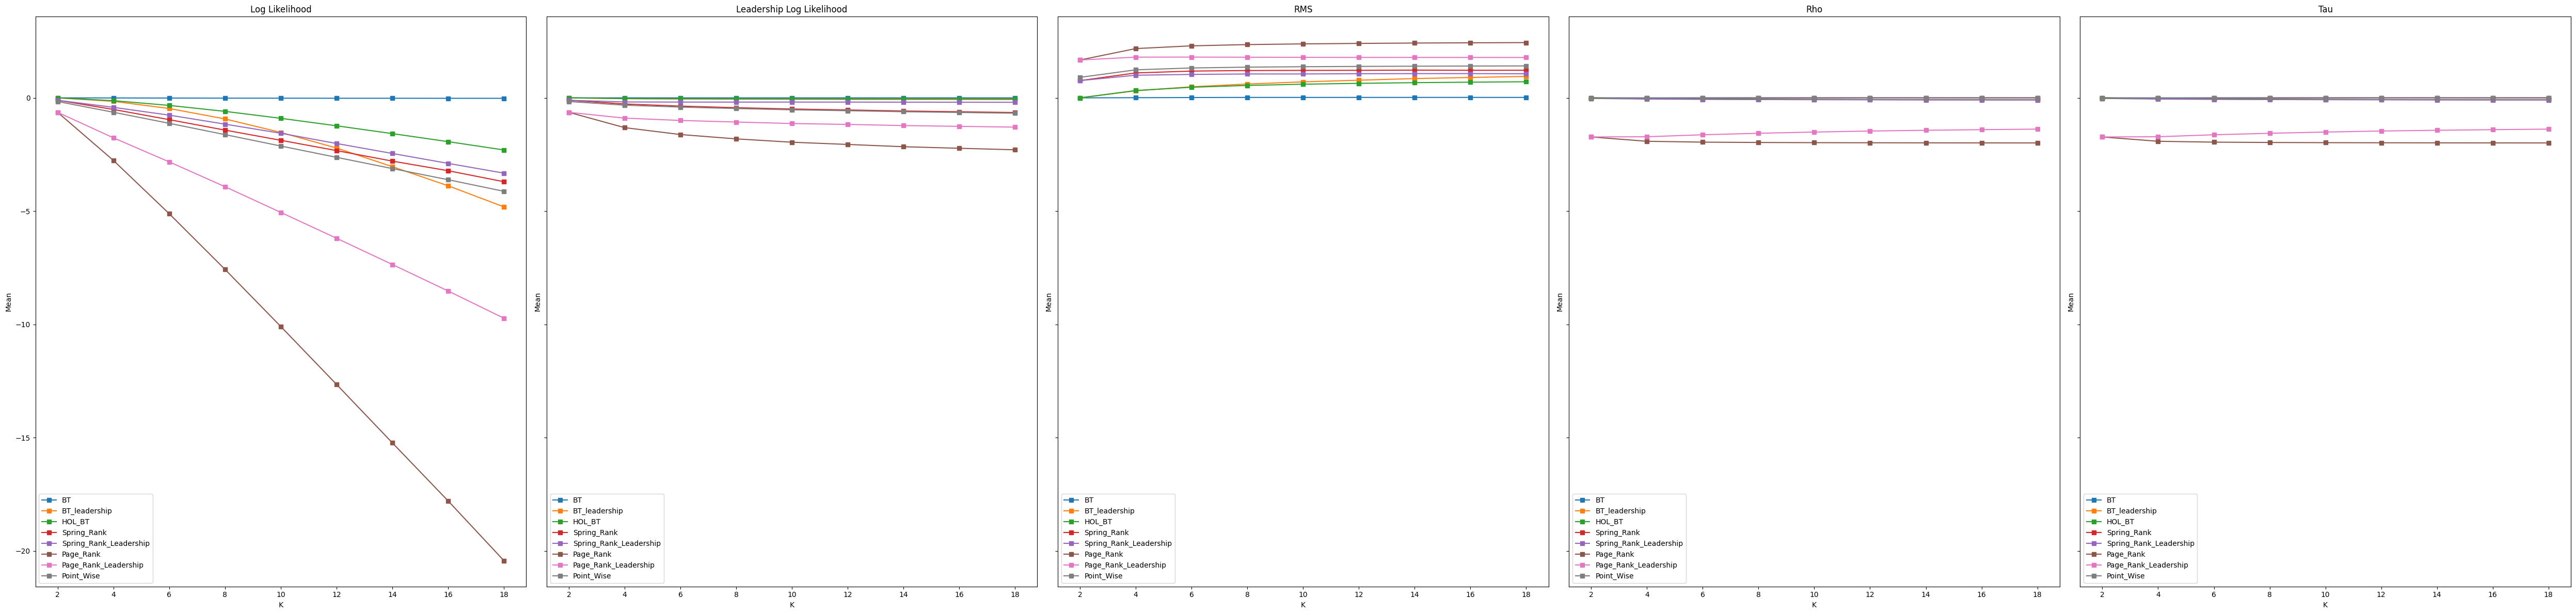

In [35]:
path = os.path.join(os.getcwd(), 'results', 'ex03.3')
visualize_results(path, compared_col='HO_BT', metric_type='mean', value_tested='K')

### Higher Order Leadership

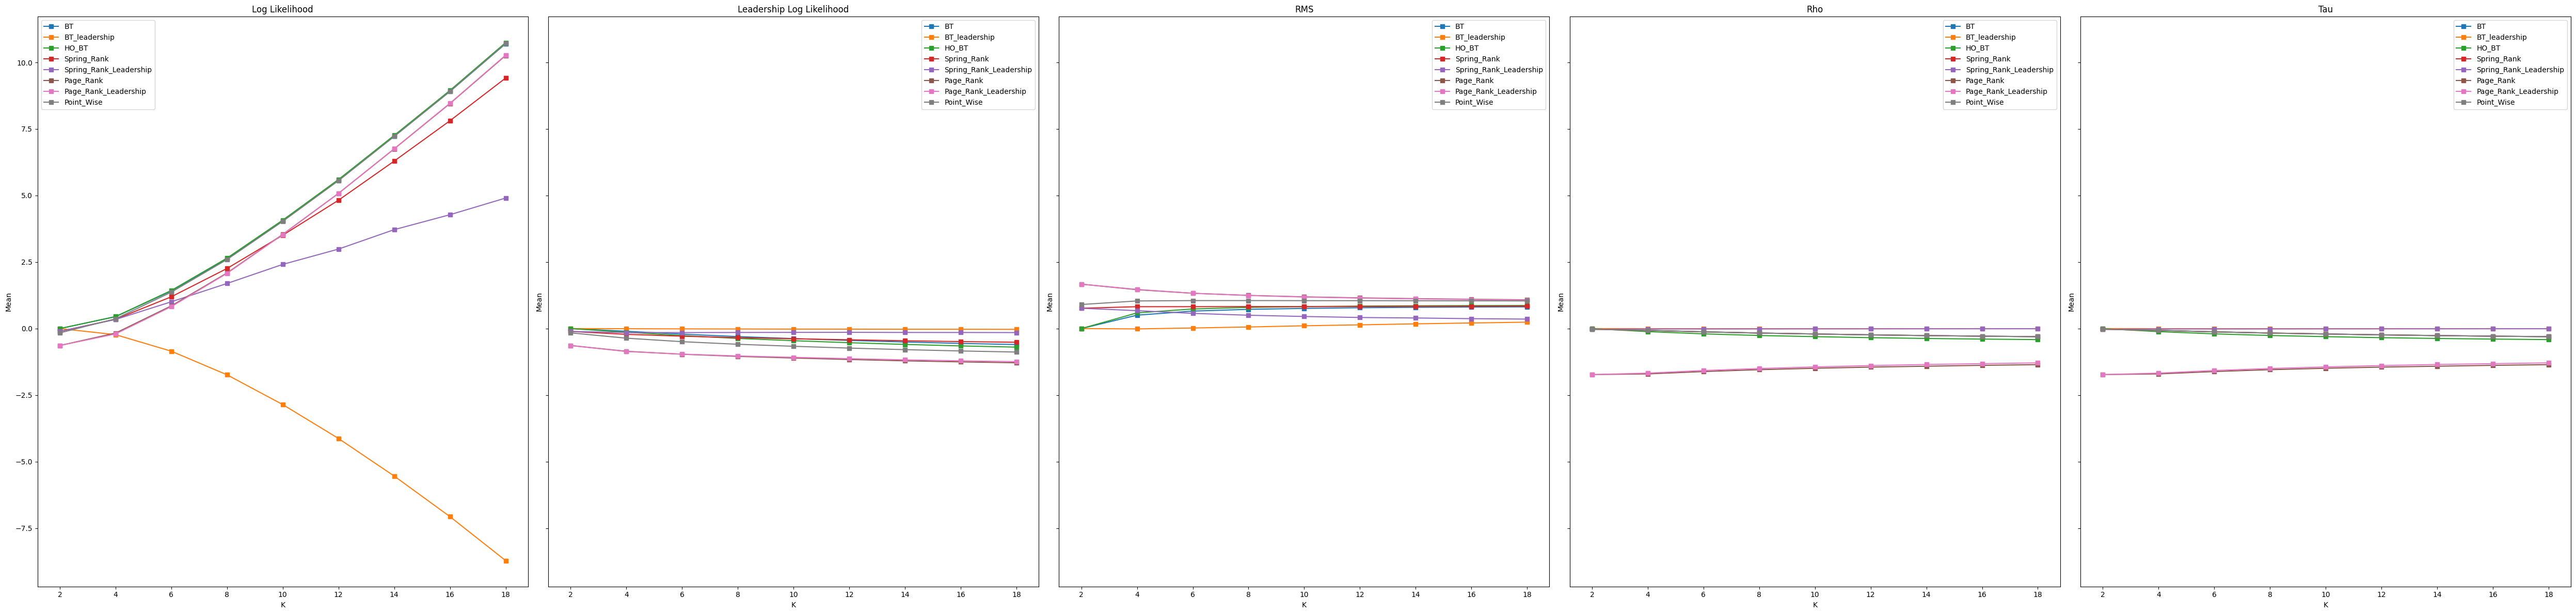

In [37]:
path = os.path.join(os.getcwd(), 'results', 'ex03.4')
visualize_results(path, compared_col='HOL_BT', metric_type='mean', value_tested='K')